# Обзор датасета **T1**.

**Загружаем все нужные библиотеки**

In [2]:
import pandas as pd
import numpy as np
import h5py
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb   
import matplotlib.pyplot as plt
import seaborn as sns

## Датасет **T1**

### Загружаем данные из **data0**
	Data0: table with data from the sensors, thermocouples and motion system. Each data point is associated with a {x, y, z} coordinate within the piece.


In [3]:
with h5py.File('/Users/tdavi/Desktop/Se/coursework/T1/T1/T1_P08_v8_PP1_1_s.hdf5', 'r') as file:
    data0 = file['data0'][:]  
    df_data0 = pd.DataFrame(data0)
    print(df_data0.head())  

   carrier_gas_sensor  powder_flow  powder_turntable  process_status  \
0                 0.0          0.0               0.0             0.0   
1                 0.0          0.0               0.0             0.0   
2                 0.0          0.0               0.0             0.0   
3                 0.0          0.0               0.0             0.0   
4                 0.0          0.0               0.0             0.0   

         q1        q2        q3        q4  speed    table_roll  ...  \
0  0.708159  0.005374  0.706016  0.004909   0.08  8.999999e+09  ...   
1  0.708159  0.005374  0.706016  0.004909   0.08  8.999999e+09  ...   
2  0.708159  0.005374  0.706016  0.004909   0.08  8.999999e+09  ...   
3  0.708159  0.005374  0.706016  0.004909   0.08  8.999999e+09  ...   
4  0.708159  0.005374  0.706016  0.004909   0.08  8.999999e+09  ...   

   thermocoupleA2  thermocoupleA3  thermocoupleA5  thermocoupleA6  \
0             0.0             0.0             0.0             0.0   
1 

### Загружаем данные из **features**
-	**Features**: table with calculated features for each data point. The features calculated are listed here:
    -	process_status
    -	Speed
    -	meltpool_width
    -	meltpool_length
    -	meltpool_area
    -	meltpool_ratio
    -	meltpool_max
    -	meltpool_mean
    -	meltpool_std
    -	meltpool_min
    -	meltpool_gradient


In [4]:
with h5py.File('/Users/tdavi/Desktop/Se/coursework/T1/T1/T1_P08_v8_PP1_1_s.hdf5', 'r') as file:
    features = file['features'][:]
    df_features = pd.DataFrame(features)
    print(df_features.head())

   meltpool_area  meltpool_gradient  meltpool_length  meltpool_max  \
0           12.0          39.284824         6.261182     35.066895   
1           31.0          38.281815         9.765511     38.215576   
2           46.0          39.253590        12.291661     39.236084   
3           38.0          39.140675         8.941196     39.224854   
4           49.0          39.083916         9.017008     39.202637   

   meltpool_mean  meltpool_min  meltpool_ratio  meltpool_std  meltpool_width  \
0      23.066895     14.066895        2.898240      6.027714        2.160339   
1      22.280092     12.215576        4.216198      7.102637        2.316189   
2      19.692606     11.236084        4.026743      7.008400        3.052507   
3      20.961695     11.224854        2.503267      6.964890        3.571811   
4      19.794474     11.202637        2.649021      6.844984        3.403901   

   process_status  speed  
0             0.0   0.08  
1             0.0   0.08  
2             0.0

### Загружаем данные из **image_data0**
	Image_data0: table with thermal images of the manufacturing process. Each image is associated with a data0 data point, and their correspondent coordinates.

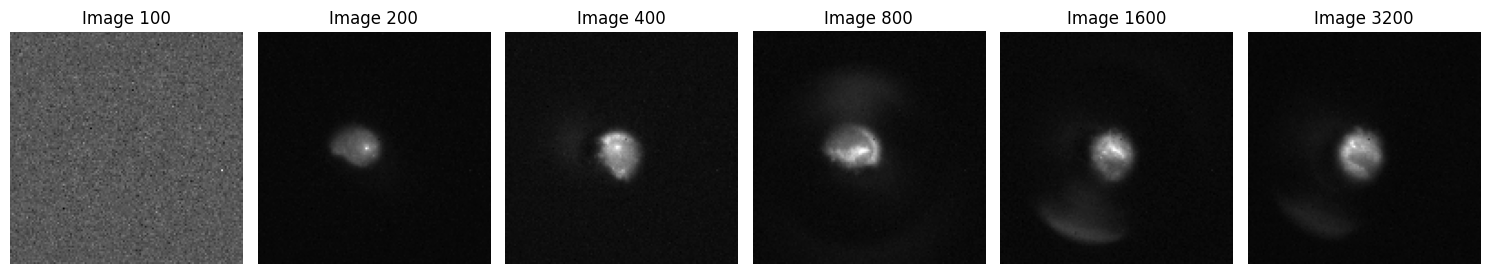

In [5]:
with h5py.File('/Users/tdavi/Desktop/Se/coursework/T1/T1/T1_P08_v8_PP1_1_s.hdf5', 'r') as file:
    image_data0 = file['image_data0'][:]


    image_indices = [100, 200, 400, 800, 1600, 3200]

    fig, axes = plt.subplots(1, len(image_indices), figsize=(15, 5))

    for i, idx in enumerate(image_indices):
        selected_image = image_data0[idx, :, :, 0]
        axes[i].imshow(selected_image, cmap='gray')
        axes[i].set_title(f"Image {idx}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()